In [1]:
using MAT;
using CuArrays;
using Plots;

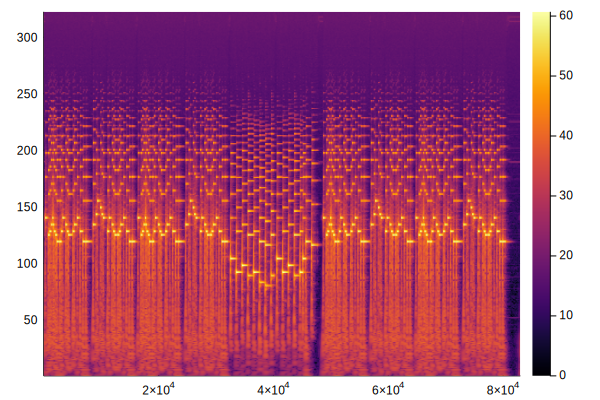

In [2]:
vars = matread("tetrisA_mono_cqt.mat");
cfs = vars["cfs"];
S = cfs["c"];
i_mid = Int(size(S,1)/2);
S = S[1:i_mid,:];
S = 10*log10.(abs.(S));
S = S .- min(S...);
heatmap(S)

In [3]:
num_components = 50;
num_iter = 5;
num_frames = 40000;

In [4]:
V = S[:,1:num_frames];
W = rand(size(V,1),num_components);
H = rand(num_components,size(V,2));
for i_iter = 1:num_iter
    print("i_iter = ",i_iter)
    print(", cost = ",sqrt(sum((W*H - V).^2)),"\n")
    H = @time H .* (W'*V) ./ (W'*W*H .+ 1e-9)
    W = @time W .* (V*H') ./ (W*H*H' .+ 1e-9)
end

i_iter = 1, cost = 58240.661103855
  0.279424 seconds (528.84 k allocations: 71.837 MiB, 8.60% gc time)
  0.142468 seconds (20.68 k allocations: 99.688 MiB, 3.78% gc time)
i_iter = 2, cost = 16625.060149955767
  0.048690 seconds (16 allocations: 45.796 MiB, 17.72% gc time)
  0.119945 seconds (16 allocations: 98.636 MiB, 1.74% gc time)
i_iter = 3, cost = 16572.706015153457
  0.048073 seconds (16 allocations: 45.796 MiB, 17.66% gc time)
  0.122639 seconds (16 allocations: 98.636 MiB, 1.20% gc time)
i_iter = 4, cost = 16542.165542199815
  0.048192 seconds (16 allocations: 45.796 MiB, 17.72% gc time)
  0.119772 seconds (16 allocations: 98.636 MiB, 1.24% gc time)
i_iter = 5, cost = 16512.143614860524
  0.048195 seconds (16 allocations: 45.796 MiB, 17.67% gc time)
  0.119279 seconds (16 allocations: 98.636 MiB, 1.23% gc time)


In [5]:
V = cu(S[:,1:num_frames]);
W = cu(rand(size(V,1),num_components));
H = cu(rand(num_components,size(V,2)));

In [6]:
for i_iter = 1:num_iter
    print("i_iter = ",i_iter)
    print(", cost = ",sqrt(sum((W*H - V).^2)),"\n")
    H = @time H .* (W'*V) ./ (W'*W*H .+ 1e-9)
    W = @time W .* (V*H') ./ (W*H*H' .+ 1e-9)
end

i_iter = 1, cost = 57985.625
  0.922900 seconds (2.54 M allocations: 130.701 MiB, 7.82% gc time)
  1.650048 seconds (4.37 M allocations: 224.797 MiB, 6.84% gc time)
i_iter = 2, cost = 16611.52260568671
  0.824850 seconds (1.86 M allocations: 97.191 MiB, 5.35% gc time)
  0.006369 seconds (4.01 k allocations: 205.074 KiB)
i_iter = 3, cost = 16561.87043523198
  0.000573 seconds (316 allocations: 15.375 KiB)
  0.000573 seconds (322 allocations: 15.484 KiB)
i_iter = 4, cost = 16532.42112442223
  0.000373 seconds (303 allocations: 15.125 KiB)
  0.000205 seconds (302 allocations: 15.109 KiB)
i_iter = 5, cost = 16503.45661868753
  0.000576 seconds (316 allocations: 15.375 KiB)
  0.000200 seconds (318 allocations: 20.750 KiB)


In [7]:
for i_iter = 1:1000
    H = H .* (W'*V) ./ (W'*W*H .+ 1e-9)
    W = W .* (V*H') ./ (W*H*H' .+ 1e-9)
end
print("cost = ",sqrt(sum((W*H - V).^2)),"\n")

cost = 3085.0476430978897


In [8]:
;nvidia-smi

Sun Apr  7 00:19:57 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.39       Driver Version: 418.39       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 970     On   | 00000000:09:00.0 Off |                  N/A |
| 41%   64C    P2    75W / 163W |   4040MiB /  4041MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [9]:
V2 = collect(V);
W2 = collect(W);
H2 = collect(H);

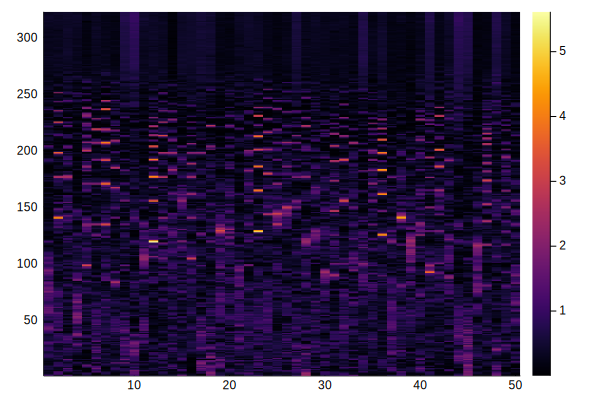

In [10]:
heatmap(W2)

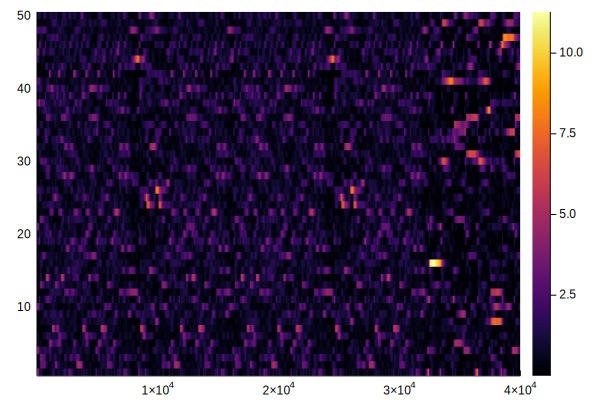

In [11]:
heatmap(H2)

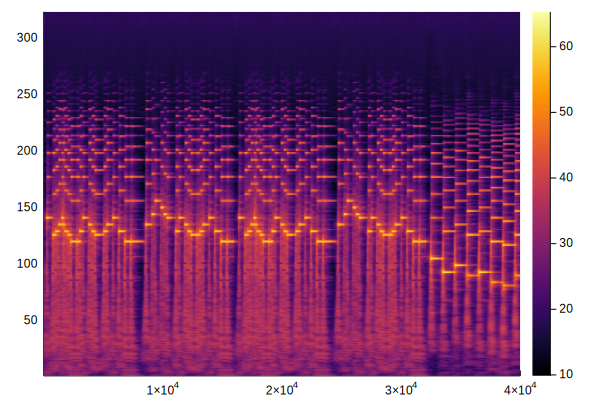

In [12]:
heatmap(W2*H2)

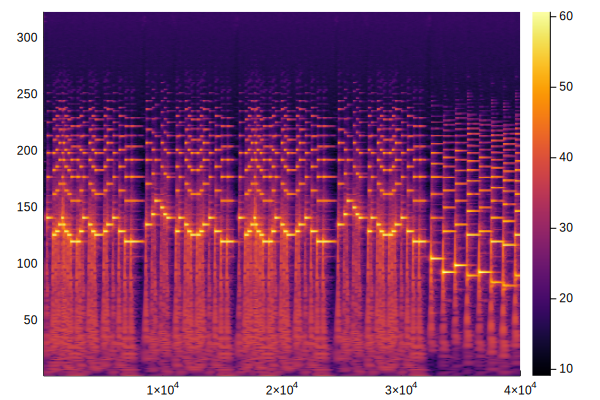

In [13]:
heatmap(V2)

In [14]:
;nvidia-smi

Sun Apr  7 00:20:07 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.39       Driver Version: 418.39       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 970     On   | 00000000:09:00.0 Off |                  N/A |
| 40%   58C    P2    55W / 163W |   4040MiB /  4041MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  